# **Key Points, Detectors and Descriptors Using Python (cv2)**
---

## **Overview**
This code demonstrates different feature detection techniques in images using OpenCV (`cv2`). It highlights three main approaches: Harris Corner Detection, Shi-Tomasi Corner Detection, and the ORB (Oriented FAST and Rotated BRIEF) detector. These methods help identify distinctive features in an image, useful for tasks such as image matching, object recognition, and 3D reconstruction.

## **1. Importing Libraries**
This section imports the necessary libraries:

- `cv2`: The OpenCV library used for image processing.
- `numpy`: A library for numerical operations, particularly for handling arrays.
- `matplotlib.pyplot`: A plotting library used to display images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **2. Reading and Preprocessing the Image**
- `cv2.imread()`: Reads the image from the specified file path.
- `cv2.cvtColor()`: Converts the image from BGR color space to grayscale.
- `np.float32()`: Converts the grayscale image to a floating-point format for further processing.

In [15]:
img = cv2.imread("/content/image.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

## **3. Displaying the Grayscale Image**
- `plt.imshow()`: Displays the grayscale image using a grayscale colormap.

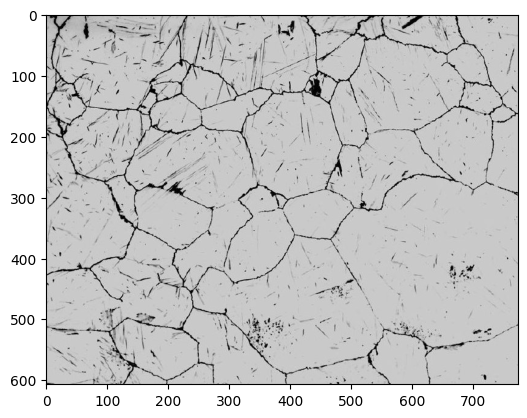

In [16]:
plt.imshow(gray_img, cmap="gray");

## **4. Harris Corner Detection**
- `cv2.cornerHarris()`: Applies Harris Corner Detection to the grayscale image.

  **Parameters**:
  - `gray_img`: The input grayscale image.
  - `2`: The size of the neighborhood considered for corner detection.
  - `3`: The aperture parameter for the Sobel operator.
  - `0.04`: The Harris detector free parameter. <br>

- The detected corners are marked in red on the original image.

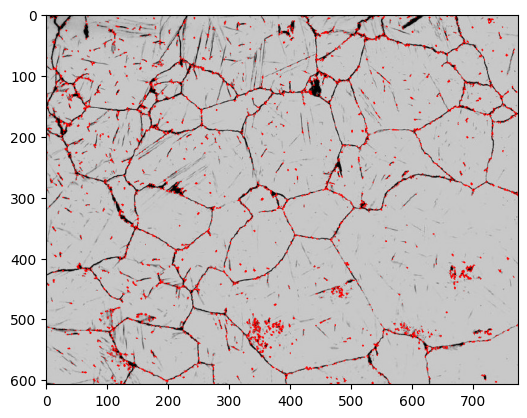

In [35]:
harris_img = cv2.cornerHarris(gray_img, 2, 3, 0.04)
color_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
color_img[harris_img > 0.01 * harris_img.max()] = [255, 0, 0]

color_img = np.clip(color_img, 0, 255).astype(np.uint8)
plt.imshow(color_img);

## **5. Shi-Tomasi Corner Detection**
- `cv2.cornerHarris()`: Applies Harris Corner Detection to the grayscale image.

  **Parameters**:
  - `gray_img`: The input grayscale image.
  - `2`: The size of the neighborhood considered for corner detection.
  - `3`: The aperture parameter for the Sobel operator.
  - `0.04`: The Harris detector free parameter.

- The detected corners are marked in red on the original image.

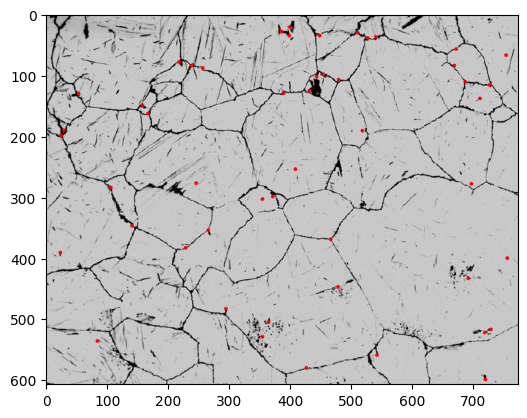

In [34]:
shi_tomasi_img = cv2.goodFeaturesToTrack(gray_img, 50, 0.01, 10)
shi_tomasi_img = np.intp(shi_tomasi_img)

color_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)

for i in shi_tomasi_img:
  x, y = i.ravel()
  cv2.circle(color_img, (x, y), 3, 255, -1)

color_img = np.clip(color_img, 0, 255).astype(np.uint8)
plt.imshow(color_img);

## **6. FAST Feature Detection**
- `cv2.FastFeatureDetector_create()`: Creates a FAST feature detector object.

  **Parameter**:
  - `50`: Threshold for determining whether a keypoint is considered strong.
  - `detect()`: Detects keypoints in the image.
  - `cv2.drawKeypoints()`: Draws detected keypoints on the image.

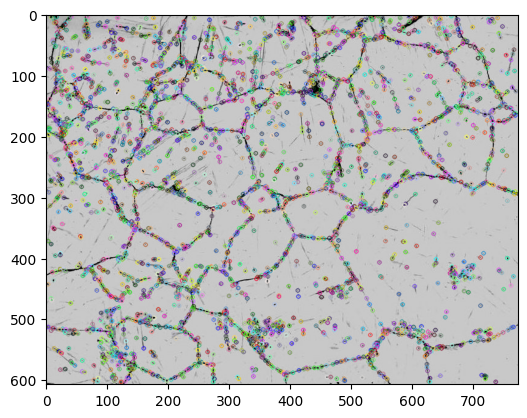

In [37]:
fast_detector = cv2.FastFeatureDetector_create(50)
keypoints = fast_detector.detect(img, None)
fast_img = cv2.drawKeypoints(img, keypoints, None, flags=0)

plt.imshow(fast_img);

## **7. ORB Detection**
- `cv2.ORB_create()`: Creates an ORB detector object.
  
  **Parameter**:
  - `50`: The maximum number of keypoints to retain.

- `detectAndCompute()`: Detects keypoints and computes their descriptors in one step.
- `cv2.drawKeypoints()`: Draws the detected keypoints and their size and orientation on the image.

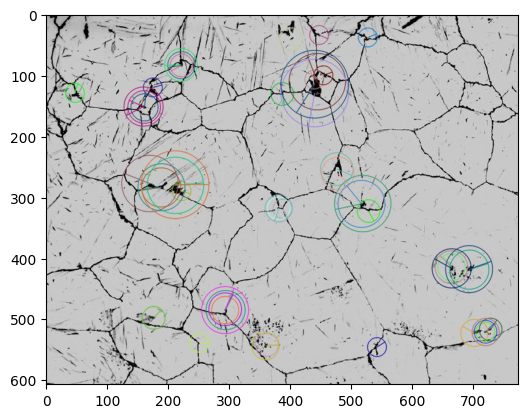

In [39]:
orb = cv2.ORB_create(50)
keypoints, descriptors = orb.detectAndCompute(img, None)
orb_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(orb_img);